# **Explorando el mercado de criptomonedas Bitcoin**
Para entender mejor el crecimiento y el impacto de Bitcoin y otras criptodivisas, en este proyecto explorarás la capitalización del mercado de diferentes criptodivisas.

![El asombroso aumento de la capitalización del mercado de Bitcoin en 2017.](images/bitcoint_market_cap_2017.png)

**Advertencia: El mercado de las criptodivisas es excepcionalmente volátil, y cualquier dinero que pongas puede desaparecer en el aire. Nunca inviertas dinero que no puedas permitirte perder.**

## **Tarea 1. Bitcoin y criptomonedas: Conjunto de datos completo, filtrado y reproducibilidad**

Desde el lanzamiento de Bitcoin en 2008, han surgido cientos de proyectos similares basados en la tecnología blockchain. Las llamamos criptodivisas (también monedas o criptos en la jerga de Internet). Algunas son extremadamente valiosas hoy en día, y otras pueden tener el potencial de convertirse en extremadamente valiosas en el futuro[^1]. De hecho, el 6 de diciembre de 2017, Bitcoin tiene una capitalización de mercado superior a los 200.000 millones de dólares.

El asombroso aumento de la capitalización de mercado de Bitcoin en 2017.

[^1]: **ADVERTENCIA**: El mercado de las criptodivisas es excepcionalmente volátil[^2] y todo el dinero que pongas podría desaparecer en el aire. Las criptodivisas mencionadas aquí podrían ser estafas similares a los esquemas Ponzi o tener muchos otros problemas (sobrevaloración, técnicos, etc.). **Por favor, no confunda esto con un consejo de inversión**.

[^2]: Actualización de marzo de 2020: Bueno, resultó ser volátil de hecho :D

Dicho esto, vamos a entrar en materia. Empezaremos con un CSV que descargamos convenientemente el 6 de diciembre de 2017 utilizando la API de coinmarketcap (NOTA: La API pública pasó a ser privada en 2020 y ya no está disponible) llamado `data/coinmarketcap_06122017.csv`.

### **Instrucciones**
Carga el archivo CSV guardado y selecciona las columnas relevantes.

1. Carga `data/coinmarketcap_06122017.csv` en un DataFrame llamado `dec6` utilizando `read_csv()` de pandas.
2. Selecciona las columnas `id` y `market_cap_usd` y asignarlas a `market_cap_raw`.
3. Utiliza `count()` para contar e imprimir el número de valores en `market_cap_raw`.

In [21]:
# Importar pandas
import pandas as pd

# Importar matplotlib y ajustar visualización para los gráficos.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Lectura del fichero data/coinmarketcap_06122017.csv con pandas
dec6 = pd.read_csv ("coinmarketcap_06012018.csv")

# Seleccionar las columnas 'id' y 'market_cap_usd'
market_cap_raw = dec6.loc[:,["id","market_cap_usd"]]
market_cap_raw.count()

id                100
market_cap_usd    100
dtype: int64

## **Tarea 2. Descartar las criptomonedas sin capitalización de mercado**

¿Por qué el `count()` para `id` y `market_cap_usd` difieren arriba? Es porque algunas criptodivisas listadas en coinmarketcap.com no tienen una capitalización de mercado conocida, esto se representa por `NaN` en los datos, y los `NaNs` no son contados por `count()`. Estas criptomonedas son de poco interés para nosotros en este análisis, por lo que es seguro eliminarlas.

In [22]:
market_cap_raw

,id,market_cap_usd
0,bitcoin,284909052105
1,ripple,119207709132
2,ethereum,100115499075
3,bitcoin-cash,44424061657
4,cardano,25916647856
...,...,...
95,quantstamp,329103148
96,raiden-network-token,317135853
97,gamecredits,314180254
98,enjin-coin,308707284


### **Instrucciones**
Filtrar las monedas sin capitalización de mercado conocida.

* Consulta con [`query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) el DataFrame y filtra todas las monedas sin valor y asigna el nuevo DataFrame a `cap`.
* Utiliza de nuevo `count()` para contar e imprime el número de valores en `cap`.

El uso del método `query()` de un DataFrame es una alternativa conveniente al uso de selectores de corte. Por ejemplo:
```
df.query('valor > 0') 
```
da el mismo resultado que
```
df[ df['valor'] > 0 ]    
```
pero con menos código.

Ten en cuenta que `query()` utiliza por defecto la sintaxis **[numexpr](https://numexpr.readthedocs.io/projects/NumExpr3/en/latest/user_guide.html)** en lugar de la sintaxis **Python**. Esto significa que esto:
```
(condición1 and condición2) or condición3
```

debería escribirse así usando `numexpr`:
```
(condición1 & condición2) | condición3
```

In [23]:
# Limpiar las filas sin capitalización de mercado
cap = market_cap_raw.query("market_cap_usd > 0")

# Contar de nuevo el número de valores   #se usa query() para coger solo valores superiores, inferiores o iguales a "". En lugar de dropna() que borra valores vacios
cap.count()

id                100
market_cap_usd    100
dtype: int64

## **Tarea 3 ¿Qué tamaño tiene Bitcoin en comparación con el resto de las criptodivisas?**

Bitcoin se encuentra bajo una seria competencia de otros proyectos, pero sigue siendo dominante en la capitalización del mercado. Vamos a trazar la capitalización de mercado de las 10 principales monedas en forma de gráfico de barras para visualizarlo mejor.

### **Instrucciones**
Visualiza la capitalización del mercado de las 10 primeras criptomonedas.
* Selecciona las 10 primeras monedas, establece como índice la columna `id` y asigna el DataFrame resultante a `cap10`.
* Calcula el porcentaje de capitalización de mercado de cada moneda utilizando `assign()` y asígnalo a `cap10` de nuevo.
* Traza el `market_cap_perc` de las 10 principales monedas en un gráfico de barras con el título *"Top 10 capitalizaciones del mercado"* y asígnelo a `ax`.
* Usando el objeto `ax`, anota el eje `y` con *"% de capitalización total"*.

Revisa la documentación de pandas para usar [`assign` con `lambda`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html) para calcular el porcentaje de capitalización de mercado. Recuerda que `assign` itera sobre todas las filas y crea una nueva columna, pero puedes introducir números externos al DataFrame, por ejemplo:
```
cap.market_cap_usd.sum()
```
;-) . Además, no olvides multiplicar por 100 dentro de la lambda para convertir la proporción resultante en un porcentaje.

Pandas tiene una interfaz para cada tipo de gráfico importante, por ejemplo `DataFrame.plot.hist()` y `DataFrame.plot.bar()`. Para anotar el eje y usando el objeto ax, puede echar un vistazo a los métodos disponibles en la documentación de **matplotlib** para el objeto [Axes](https://matplotlib.org/api/axes_api.html#axis-limits). 

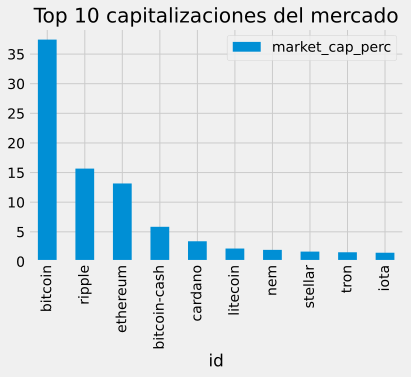

In [24]:
# Declaración de las etiquetas de los gráficos
TOP_CAP_TITLE = 'Top 10 capitalizaciones del mercado'
TOP_CAP_YLABEL = '% de capitalización total'

# Selección de las 10 primeras filas y asignación del índice
#Metodo1:
cap10 = cap.head(10).set_index("id")  #podemos utilizar METODOS con el punto con DATAFRAMES por eso podemos concatenar metodos
#Metodo2: (Slicer)
#cap10 = cap[:10].set_index("id")######


# Cálculo de market_cap_perc
####METODO 1:
###total_cap = cap["market_cap_usd"].sum() #### LA FORMA MAS CONOCIDA. LA SIGUIENTE ES UNA MANERA DE LLAMAR A LAS COLUMNAS CON PANDA
total_cap=cap.market_cap_usd.sum()  
cap10 = cap10.assign(market_cap_perc = lambda x: (x["market_cap_usd"] / total_cap) * 100) 
###METODO 2:
###cap10 = cap10.assign(market_cap_perc = lambda x:(x.market_cap_usd /cap.market_cap_usd.sum()).round(3) * 100)   ####

# Generación del gráfico de barras con el título definido arriba
ax = cap10.plot.bar(y = "market_cap_perc", title = TOP_CAP_TITLE ) #AL HACER ANTERIORMENTE "SET_INDEX" NO ES NECESARIO DEFINIR LA X EN LA GRAFICA, LO COGE POR DEFECTO
# Ajuste del título del eje y del gráfico




## **Tarea 4. Facilitar la lectura de la trama y hacerla más informativa**
Aunque el gráfico anterior es suficientemente informativo, puede mejorarse. Bitcoin es demasiado grande, y las otras monedas son difíciles de distinguir debido a esto. En lugar del porcentaje, utilicemos una escala log10 de la capitalización "en bruto". Además, utilicemos el color para agrupar monedas similares y hacer que el gráfico sea más informativo[^1].

Para el razonamiento de los colores: `bitcoin-cash` y `bitcoin-gold` son bifurcaciones de la blockchain de bitcoin[^2]. `Ethereum` y `Cardano` ofrecen contratos inteligentes *Turing Complete*. `Iota` y `Ripple` no son minables. `Dash`, `Litecoin` y `Monero` tienen su propio color.

[^1]. Esta coloración es una simplificación. Hay más diferencias y similitudes que no se representan aquí.

[^2]. Las bifurcaciones de bitcoin son en realidad muy diferentes, pero está fuera del alcance hablar de ellas aquí. Por favor, revisa la advertencia anterior y haz tu propia investigación.

### **Instrucciones**
Vuelve a generar el gráfico de la última tarea sea más informativo con colores y una bonita escala logarítmica.
* Genera un gráfico como el de la última tarea, pero de `market_cap_usd`. Añada los COLORES dados y haz que el eje y tenga una escala logarítmica de 10.
* De nuevo, utilice el objeto `ax` para anotar el eje y con "USD".
* Elimine la etiqueta inútil en el eje x.

Escala el eje y usando un argumento a `plot.bar()`, para mejorar la visualización del grafico. No modifique el valor real de la columna.

Text(0.5, 0, '')

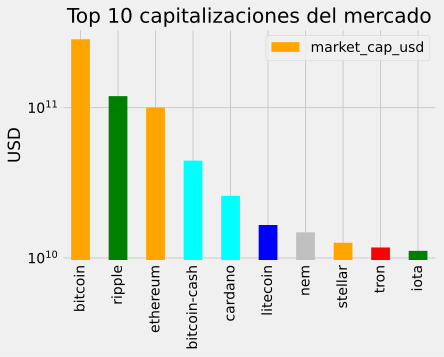

In [25]:
# Lista de colores para el gráfico de barras
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Visualización de market_cap_usd como antes, pero añadiendo los colores y el escalado del eje y
ax = cap10.plot.bar(y = "market_cap_usd", logy = True, title = TOP_CAP_TITLE, color = COLORS)
#Anotacion del eje y con "USD"
ax.set_ylabel("USD")
#TOQUE FINAL. Eliminacion etiqueta x, pues no informa
ax.set_xlabel(None)



## **Tarea 5. ¿Qué está pasando? Volatilidad en las criptodivisas**
El mercado de las criptodivisas ha sido espectacularmente volátil desde que se abrió el primer intercambio. Por algo este notebook comenzó con una gran y audaz advertencia. Exploremos un poco más esta volatilidad. Empezaremos seleccionando y trazando el porcentaje de cambio de 24 horas y 7 días, que ya tenemos disponible.

### **Instrucciones**
Crea un DataFrame que contenga información sobre la volatilidad de las criptomonedas.

* Selecciona las columnas `id`,`percent_change_24h` y `percent_change_7d` de `dec6` y asigna el DataFrame resultante a volatilidad.
* Establece el índice en `id` y elimina todas las filas que contengan *NaNs*.
* Ordena la volatilidad por `percent_change_24h` en orden ascendente.
* Imprime el `head()` de volatilidad. Crea un DataFrame que contenga información sobre la volatilidad de las criptomonedas.

In [26]:
# Selección de las columnas 'id', 'percent_change_24h' y 'percent_change_7d columns'
volatility = dec6.loc[:, ["id", "percent_change_24h", "percent_change_7d"]]

# Ajuste del índice a 'id' y eliminación de las filas con NaN
volatility = volatility.set_index("id").dropna()

# Ordenación del DataFrame por la columna 'percent_change_24h' en orden ascendente
volatility = volatility.sort_values("percent_change_24h")


# Mostrar las primeras filas
volatility.head(10)


,percent_change_24h,percent_change_7d
id,,
ardor,-20.83,2.76
tenx,-15.81,6.55
tron,-12.63,434.36
digixdao,-12.19,15.65
status,-11.95,201.88
bitcoindark,-10.74,15.60
ripple,-9.23,24.15
monacoin,-8.92,-16.09
nxt,-7.82,4.52


## **Tarea 6. Bueno, ya podemos ver que las cosas están *un poco* locas**
Parece que se puede perder mucho dinero rápidamente en las criptodivisas. Vamos a buscar el top 10 de los mayores ganadores y el top 10 de los perdedores en la capitalización del mercado.

### **Instrucciones**
Haz un gráfico de barras que muestre los mayores ganadores y los mayores perdedores. Termina de escribir la función que mostrará los mayores perdedores a la izquierda y los mayores ganadores a la derecha.

* Utiliza `plot.bar()` para trazar los "mayores perdedores" de `volatility_series` en color `'darkred'`.
* Establece el título principal de la figura utilizando el método `fig.suptitle()`.
* Establece la etiqueta y para el gráfico de la izquierda utilizando su objeto `Axes`.
* Utiliza `plot.bar()` de nuevo para mostrar el gráfico de barras de los "principales ganadores" en color `'darkblue'`.
* Llama a la `funcióntop10_subplot` con `volatility.percent_change_24h` y el título suministrado.

La función asume que `volatility_series` está ordenada y, por tanto, `volatility_series[:10]` seleccionaría los 10 principales perdedores y `volatility_series[-10:]` seleccionaría los 10 principales ganadores.

En esta tarea, el subgráfico ya está definido. Para asignar un gráfico de pandas a un subgrupo de **matplotlib**, hay que hacer lo siguiente:
```
fig, axes = plt.subplots(...)
# Asigna el gráfico de pandas resultante al primer subplot
df1.plot.bar(ax=axes[0])
# Asigna el gráfico de pandas resultante al segundo subgrupo
df2.plot.bar(ax=axes[1]) 
```

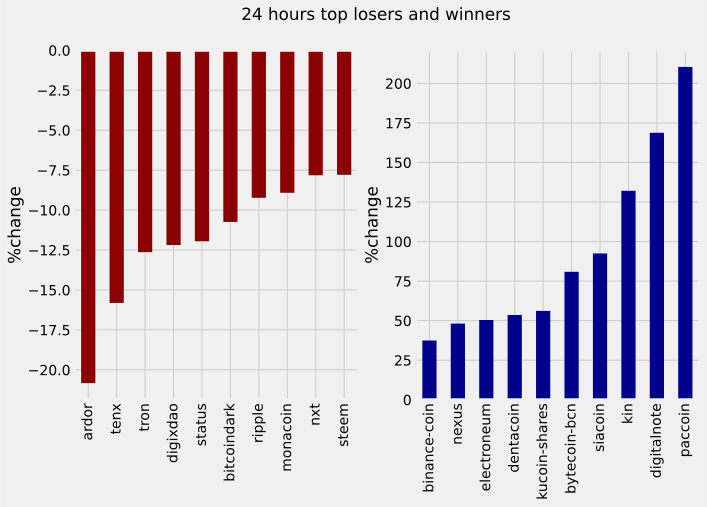

In [27]:
# Definición de una función con 2 parámetros: la serie a mostrar y el título
def top10_subplot(volatility_series, title):
    # Generación del subgráfico
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Mostrar el gráfico de barras de pandas para los perdedores
    ax_top_losers = volatility_series[:10].plot.bar(color = "darkred", ax = axes[0])
    
    # Establecer el título principal a la cadena recibida por parámetro
    fig.suptitle(title)
    # Establecer la etiqueta del eje y a '% change' (porcentaje de cambio)
    ax_top_losers.set_ylabel("%change")
    ax_top_losers.set_xlabel (None)
    
    # Lo mismo que arriba, pero para los 10 ganadores
    ax_top_winners = volatility_series[-10:].plot.bar(color = "darkblue", ax =axes[1])
    ax_top_winners.set_ylabel("%change")
    ax_top_winners.set_xlabel (None)
    
    # Devolver los valores generados. Pueden ser útiles para más adelante
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Llamada a la función definida anteriormente con la serie del período de 24 horas y el título DTITLE
fig, ax = top10_subplot(volatility["percent_change_24h"], DTITLE)

## **Tarea 7. Ok, esos son... interesantes. Comprobemos también las series semanales.**

¡¿Un 800% de aumento diario?! ¿Por qué estamos haciendo esta práctica y no estamos comprando monedas al azar?[^1]

Vamos a tranquilizarnos y a reutilizar la función definida anteriormente para ver lo que pasa semanalmente en lugar de diariamente.

[^1] Por favor, tómate un momento para entender las implicaciones de las gráficas rojas sobre el valor que pierden algunas criptodivisas en periodos de tiempo tan cortos.

### **Instrucciones**
Llama a la función de la tarea anterior, pero con los datos semanales.
* Ordene la volatilidad por `percent_change_7d` en orden ascendente y asígnela a `volatility7d`.
* Llama a `top10_subplot` con `volatilidad7d` y el título suministrado.

Ten en cuenta que los datos no están ordenados y que `top10_subplot` asume que la serie está en orden ascendente.

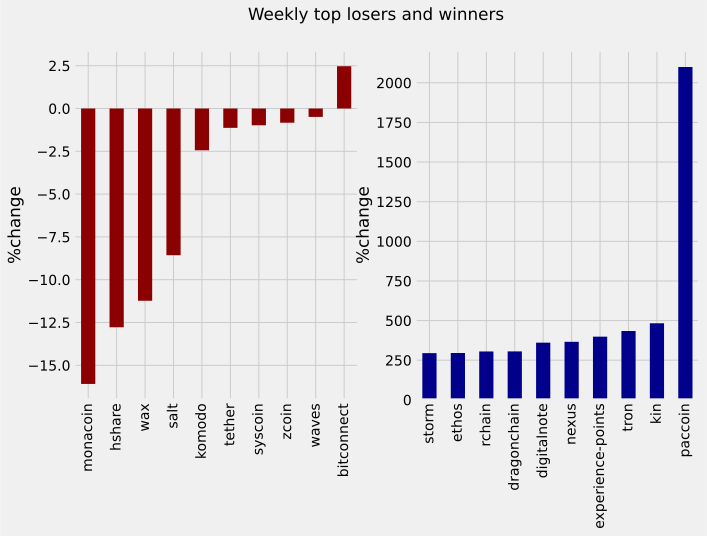

In [28]:
# Ordenación de 'percent_change_7d' de manera ascendente
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Weekly top losers and winners"

# Llamada a la función top10_plot para generar el gráfico
fig, ax = top10_subplot(volatility7d["percent_change_7d"], WTITLE)

## **Tarea 8. ¿Qué tan pequeño es lo pequeño?**
Los nombres de las criptodivisas mencionadas son bastante desconocidos, y hay una fluctuación considerable entre los cambios porcentuales de 1 y 7 días. Al igual que con las acciones, y muchos otros productos financieros, cuanto menor es la capitalización, mayor es el riesgo y la recompensa. Las criptomonedas más pequeñas son proyectos menos estables en general, y por lo tanto son inversiones aún más arriesgadas que las más grandes[^1]. Vamos a clasificar nuestro conjunto de datos basándonos en las definiciones de capitalización de Investopedia para las acciones de las empresas.

[^1] Las criptomonedas son una nueva clase de activos, por lo que no son directamente comparables a las acciones. Además, no hay límites establecidos en piedra para lo que es una acción "pequeña" o "grande". Por último, algunos inversores sostienen que el bitcoin es similar al oro, lo que las haría más comparables a una materia prima.

### **Instrucciones**
1. Utiliza el método `query()` para seleccionar todas las monedas de gran capitalización. Es decir, las monedas en las que `market_cap_usd` es de +10 mil millones de USD. 
2. Asigna el DataFrame resultante a `largecaps`.
3. Imprime `largecaps`.

In [31]:
# Selección de todo lo que sea mayor de 10 billones (americanos)
largecaps = dec6.query("market_cap_usd > 10e+9")
#largecaps = dec6[dec6["market_cap_usd"]>= 10**9]


# Mostrar largecaps
largecaps

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745
5,5,2105240000,54637708,litecoin,1515230641,16574020942,8.400000e+07,Litecoin,2.31,22.26,32.85,0.018337,303.344000,6,LTC,54637708
6,6,146039000,8999999999,nem,1515230644,14813369998,NaN,NEM,-1.82,-2.53,69.65,0.000099,1.645930,7,XEM,8999999999
7,7,656389000,17877794558,stellar,1515230643,12634630726,NaN,Stellar,1.58,-4.94,110.28,0.000043,0.706722,8,XLM,103570548975
8,8,2971610000,65748192475,tron,1515230654,11741640953,NaN,TRON,-1.80,-12.63,434.36,0.000011,0.178585,9,TRX,100000000000
9,9,194039000,2779530283,iota,1515230652,11143859582,2.779530e+09,IOTA,-3.03,0.89,19.45,0.000242,4.009260,10,MIOTA,2779530283


### **Tarea 9. La mayoría de las monedas son diminutas**
Hay que tener en cuenta que muchas monedas no son comparables a las grandes empresas en cuanto a capitalización bursátil, así que vamos a desviarnos de la definición original de Investopedia fusionando categorías.

Esto es todo por ahora. ¡Gracias por completar este proyecto!

### **Instrucciones**
Agrupa las monedas de *gran*, *mediana* y *pequeña* capitalización en un grupo llamado `biggish` y haz un diagrama de barras de los recuentos de las monedas *biggish*, *micro* y *nano*.

1. Cuenta cuántas monedas biggish, micro y nano hay utilizando la función dada `capcount`.
2. Haz una lista con estos 3 números y asígnala a `values`.
3. Haz un gráfico de barras con `values` y las etiquetas proporcionadas.

Estas son las definiciones de capitalización de mercado de Investopedia:
* Gran capitalización: +10 mil millones
* Mediana capitalización: 2.000 millones - 10.000 millones
* Pequeña capitalización 300 millones - 2.000 millones
* Micro capitalización: 50 millones - 300 millones
* Nano capitalización: Por debajo de 50 millones

Como `capcount` utiliza el método `query()` el argumento para `capcount` debe ser una cadena que defina una condición para qué valores seleccionar.

Para esta tarea final utilizaremos la interfaz `bar` de **matplotlib**, en lugar de pandas, ya que es más conveniente. Consulta la documentación de **matplotlib.pyplot.bar** para obtener una referencia.

<BarContainer object of 3 artists>

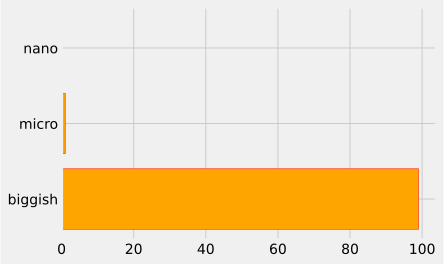

In [32]:
def capcount(query_string):
    return cap.query(query_string).count().id

# Etiquetas para el gráfico
LABELS = ["biggish", "micro", "nano"]

# Usar capcount para contar las cryptos más grandes
biggish = capcount ( "market_cap_usd > 300e+06" )

# Ídem para las micro
micro = capcount ("market_cap_usd > 50e+06 & market_cap_usd < 300e+06")

# ...y las nano
nano =  capcount ( 'market_cap_usd < 50e+6' )

# Construir una lista con los 3 valores
values = [biggish, micro, nano]

# Generar el gráfico con matplotlib
plt.barh(LABELS, values, color = "orange", edgecolor = "red" )

In [34]:
#TODO EL DINERO INVERTIDO EN 2018
cap_total = dec6["market_cap_usd"].sum()
cap_total

760824277306

In [35]:
#PORCENTAJE DE CAPITALIZACION DE LAS MAS GRANDES (88 EUROS DE CADA 100 ESTAN INVERTIDOS EN 10 MONEDAS. LAS TOP 10)
cap_perc_total = cap10["market_cap_perc"].sum()
cap_perc_total

84.31388313440996